In [2]:
#install.packages("fma")
#install.packages("xts")
require(fma)
require(forecast)

Loading required package: fma
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘fma’”Loading required package: forecast
Loading required package: timeDate
This is forecast 7.3 



FMA isn't available from the conda environment. I've loaded forecast, which is where most of the tools we need for this week actually live. I'll see about getting FMA installed as I move forward.

I picked "H" because I'm lazy. It's the symbol for Hyatt Hotels.

In [3]:
yahoo <- 'http://ichart.finance.yahoo.com/table.csv?s=H' # The URL for stock data.
data <- read.table(yahoo,sep=',', header = TRUE)         # Load the data straight into R.
data$Date <- as.Date(data$Date)                          # The Date column isn't recognized as a date.

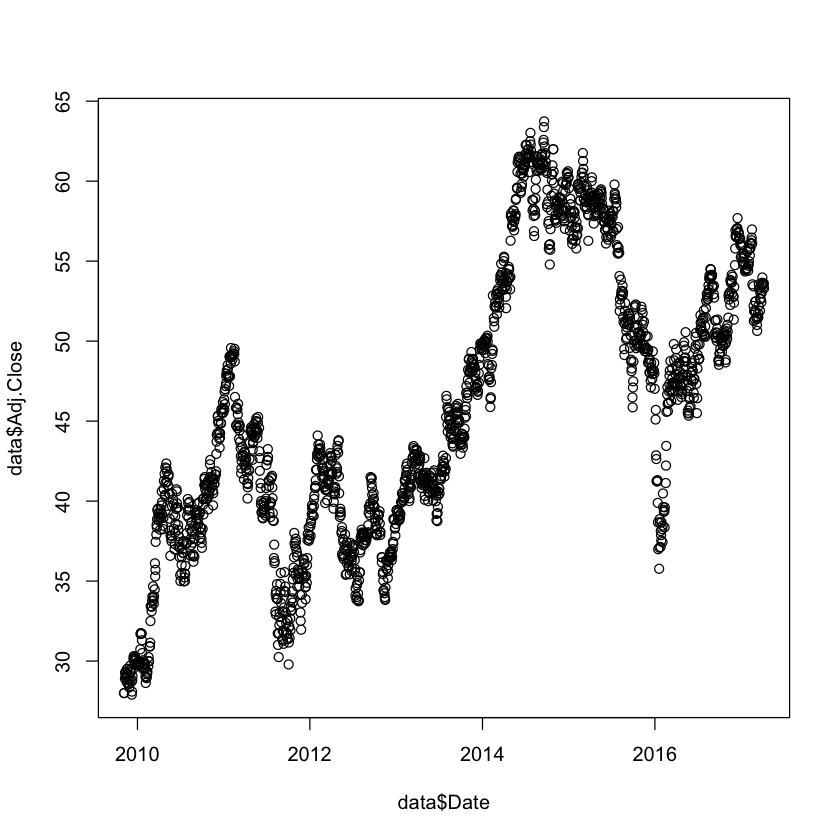

In [4]:
plot(data$Date, data$Adj.Close)                          # Let's look at the whole thing, before converting to ts.

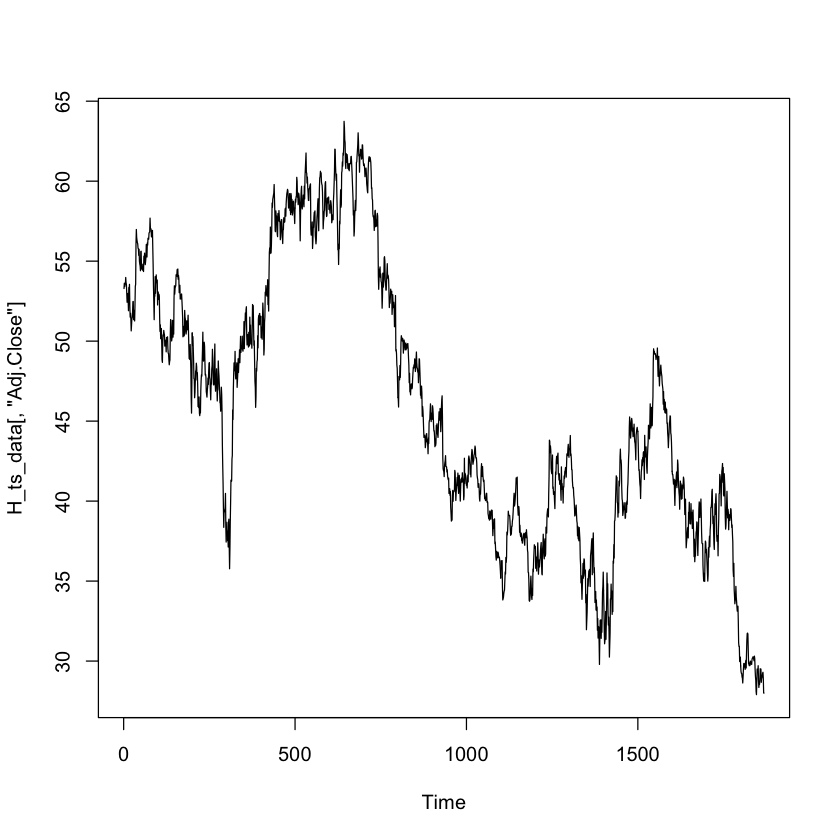

In [5]:
H_ts_data <- ts(data)          # Now let's try it as a ts object
plot(H_ts_data[,"Adj.Close"])

Go look at this again. The data in this graph is 'backwards'. The '0' data on the X axis is the most recent.

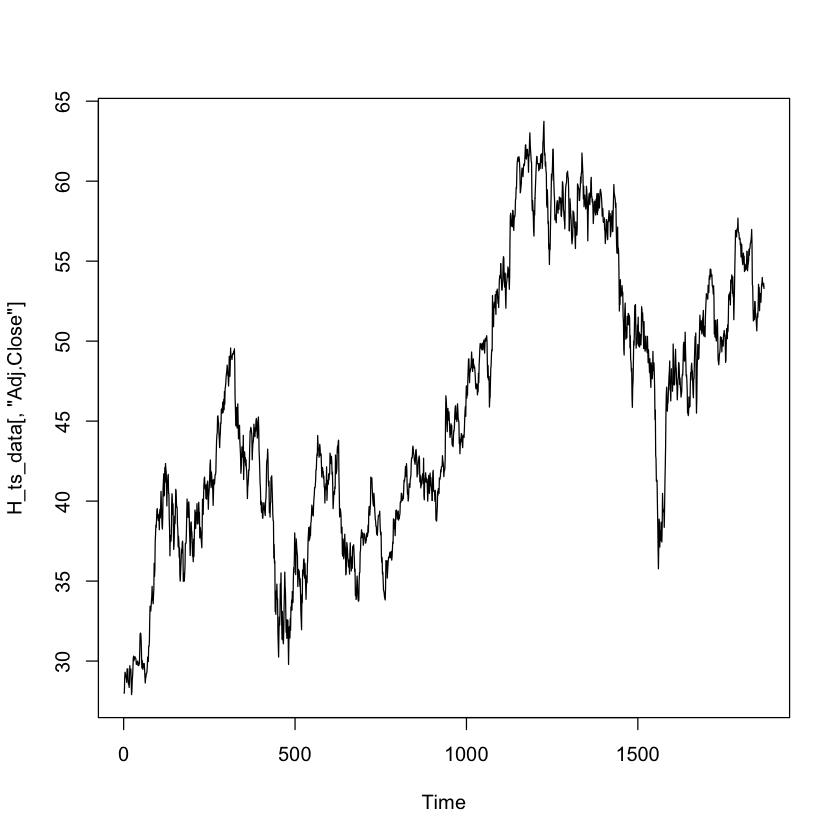

In [6]:
# ts is sorted in descending order of data, so the newer dates get the lower index numbers!
data2 <- data[order(data$Date, decreasing = FALSE),]    # use order() to fix the direction of the data!
H_ts_data <- ts(data2)                                  # convert to ts() object
plot(H_ts_data[,"Adj.Close"])                           # plot it out!

That looks way better!

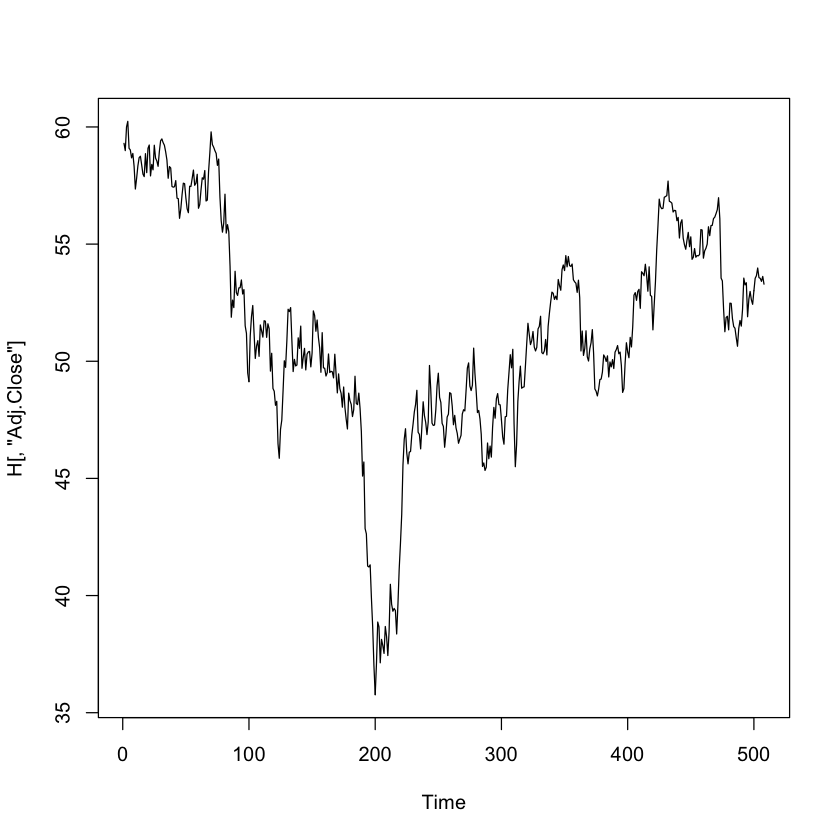

In [10]:
# Now to limit it to the last two years. 
# ts() objects don't keep the Date, by default, so a window won't quite work.
H <- ts(data2[data2["Date"] > "2015-04-05",])
plot(H[,"Adj.Close"])

Cool. The data looks a lot like the last third or so of the other graphs, and a head/tail of the data will show the right time ranges:


In [11]:
head(H)
tail(H)

Date,Open,High,Low,Close,Volume,Adj.Close
16531,58.08,59.69,58.08,59.30,326700,59.30
16532,59.57,59.67,58.98,58.99,419600,58.99
16533,59.17,60.20,58.81,60.00,643100,60.00
16534,59.99,60.25,59.52,60.24,353300,60.24
16535,60.22,60.35,58.96,59.09,444700,59.09
16538,59.41,59.47,58.94,59.02,182000,59.02


,Date,Open,High,Low,Close,Volume,Adj.Close
"[503,]",17256,53.69,54.18,53.67,53.98,596500,53.98
"[504,]",17259,54.00,54.32,53.54,53.57,711400,53.57
"[505,]",17260,53.25,53.92,53.03,53.54,629300,53.54
"[506,]",17261,53.81,54.32,53.38,53.41,670700,53.41
"[507,]",17262,53.25,53.77,53.11,53.62,623900,53.62
"[508,]",17263,53.37,53.52,52.72,53.29,709600,53.29


OK... that's not actually all that helpful. The Date here is days since 1/1/1970, let's see if those numbers make sense...

In [28]:
16531/365.25
17263/365.25

[1] 45.25941

[1] 47.26352

That about makes sense. We're 47 years out from 1970, and April is just over 1/4 of the year.

In [41]:
meanf(H[,"Adj.Close"], 10)
line1 <- meanf(H[,"Adj.Close"], 100)
naive(H[,"Adj.Close"], 10)
line2 <- naive(H[,"Adj.Close"], 100)
snaive(H[,"Adj.Close"], 10)
line3 <- snaive(H[,"Adj.Close"], 100)
rwf(H[,"Adj.Close"], 10, drift=TRUE)
line4 <- rwf(H[,"Adj.Close"], 100, drift=TRUE)

    Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
509       51.33746 45.21342 57.4615 41.96137 60.71355
510       51.33746 45.21342 57.4615 41.96137 60.71355
511       51.33746 45.21342 57.4615 41.96137 60.71355
512       51.33746 45.21342 57.4615 41.96137 60.71355
513       51.33746 45.21342 57.4615 41.96137 60.71355
514       51.33746 45.21342 57.4615 41.96137 60.71355
515       51.33746 45.21342 57.4615 41.96137 60.71355
516       51.33746 45.21342 57.4615 41.96137 60.71355
517       51.33746 45.21342 57.4615 41.96137 60.71355
518       51.33746 45.21342 57.4615 41.96137 60.71355

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
509          53.29 52.26808 54.31192 51.72711 54.85289
510          53.29 51.84479 54.73522 51.07974 55.50027
511          53.29 51.51998 55.06002 50.58299 55.99701
512          53.29 51.24616 55.33384 50.16421 56.41579
513          53.29 51.00492 55.57509 49.79527 56.78474
514          53.29 50.78682 55.79319 49.46171 57.11829
515          53.29 50.58625 55.99375 49.15497 57.42503
516          53.29 50.39957 56.18043 48.86947 57.71053
517          53.29 50.22424 56.35576 48.60132 57.97868
518          53.29 50.05840 56.52160 48.34770 58.23230

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
509          53.29 52.26808 54.31192 51.72711 54.85289
510          53.29 51.84479 54.73522 51.07974 55.50027
511          53.29 51.51998 55.06002 50.58299 55.99701
512          53.29 51.24616 55.33384 50.16421 56.41579
513          53.29 51.00492 55.57509 49.79527 56.78474
514          53.29 50.78682 55.79319 49.46171 57.11829
515          53.29 50.58625 55.99375 49.15497 57.42503
516          53.29 50.39957 56.18043 48.86947 57.71053
517          53.29 50.22424 56.35576 48.60132 57.97868
518          53.29 50.05840 56.52160 48.34770 58.23230

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
509       53.27815 52.25533 54.30096 51.71388 54.84241
510       53.26629 51.81839 54.71420 51.05191 55.48068
511       53.25444 51.47938 55.02950 50.53972 55.96916
512       53.24258 51.19091 55.29426 50.10481 56.38036
513       53.23073 50.93464 55.52682 49.71916 56.74230
514       53.21888 50.70117 55.73658 49.36838 57.06937
515       53.20702 50.48494 55.92911 49.04395 57.37009
516       53.19517 50.28230 56.10804 48.74032 57.65001
517       53.18331 50.09075 56.27588 48.45364 57.91299
518       53.17146 49.90845 56.43447 48.18111 58.16181

ERROR: Error in xy.coords(x, y): 'x' is a list, but does not have components 'x' and 'y'


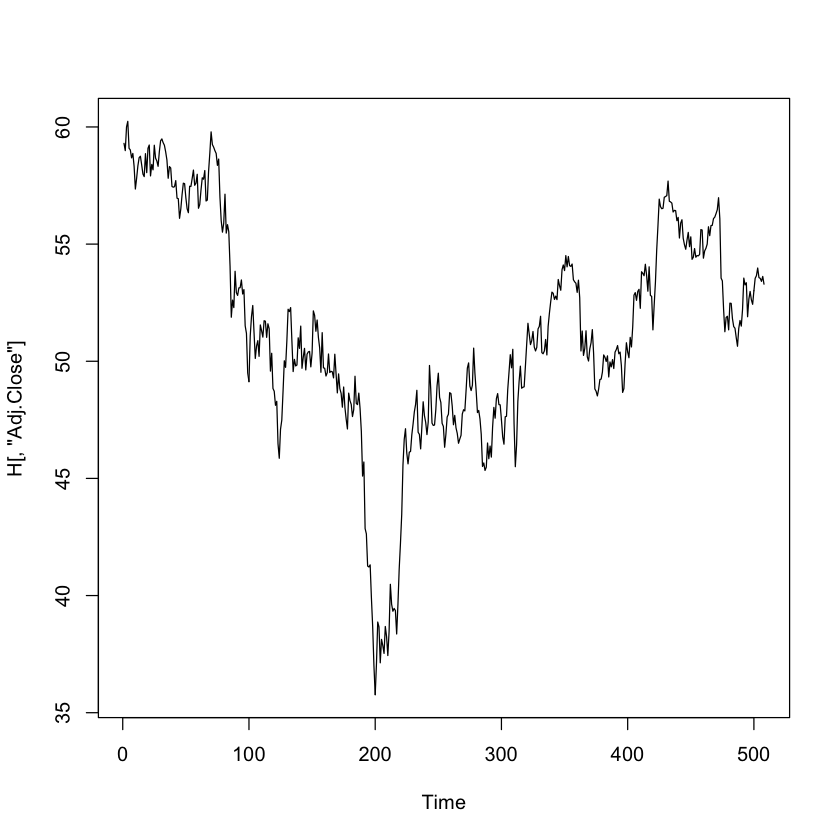

In [44]:
plot(H[,"Adj.Close"])
lines(line1$mean,col=1)
lines(line2$mean,col=2)
lines(line3$mean,col=3)
lines(line4$mean,col=4)

In [39]:
line1

    Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
509       51.33746 45.21342 57.4615 41.96137 60.71355
510       51.33746 45.21342 57.4615 41.96137 60.71355
511       51.33746 45.21342 57.4615 41.96137 60.71355
512       51.33746 45.21342 57.4615 41.96137 60.71355
513       51.33746 45.21342 57.4615 41.96137 60.71355
514       51.33746 45.21342 57.4615 41.96137 60.71355
515       51.33746 45.21342 57.4615 41.96137 60.71355
516       51.33746 45.21342 57.4615 41.96137 60.71355
517       51.33746 45.21342 57.4615 41.96137 60.71355
518       51.33746 45.21342 57.4615 41.96137 60.71355
519       51.33746 45.21342 57.4615 41.96137 60.71355
520       51.33746 45.21342 57.4615 41.96137 60.71355
521       51.33746 45.21342 57.4615 41.96137 60.71355
522       51.33746 45.21342 57.4615 41.96137 60.71355
523       51.33746 45.21342 57.4615 41.96137 60.71355
524       51.33746 45.21342 57.4615 41.96137 60.71355
525       51.33746 45.21342 57.4615 41.96137 60.71355
526       51.33746 45.21342 